# **Clinching Through the Press: A Network Analysis of Public Boxing Challenges in Central Chile, 1920–1930**

**Abstract**
>This poster explores public boxing challenges in Chilean newspapers using social network analysis. It examines networks among boxers, the centrality of crucial actors in the boxing circuit, and the role of the printing press as brokers in the emerging boxing circuit in Santiago and Nearby, cities during the 1920s. 

**Introduction**

>The 1920s  witnessed an explosion of boxing spectacles in Chile’s major cities. For emerging boxers, publishing a boxing challenge in the printing press was one of the most frequent ways of arranging a fight. Boxing challenges were advertised in the specialized sporting press like Revista Los Sports, and also in traditional newspapers such as El Mercurio y La Nación. A boxing challenge was usually a brief note in a printed publication, in which a boxer would invite another sportsman to arrange a fight and sign a contract in the presence of a manager. Occasionally, a boxing challenge would specify the fight’s conditions, but most of the time characteristics of a bout would be sanctioned when the contract was signed. Challenges were mostly used by emerging boxers to get in contact with other athletes, build a fighting record, gain experience, and eventually start a career in the ring. Although professional boxers would also challenge each other publicly, they had more formalized ways of arranging and promoting a fight that involved other actors in the industry --boxing entrepreneurs, professional managers, and boxing promoters-- and had extensive media coverage. For boxing enthusiasts and wanna-be professionals, the absence of established governing bodies gave them relative freedom to challenge each other, and set the conditions of the fights without observing established regulations.


<div Challenge>
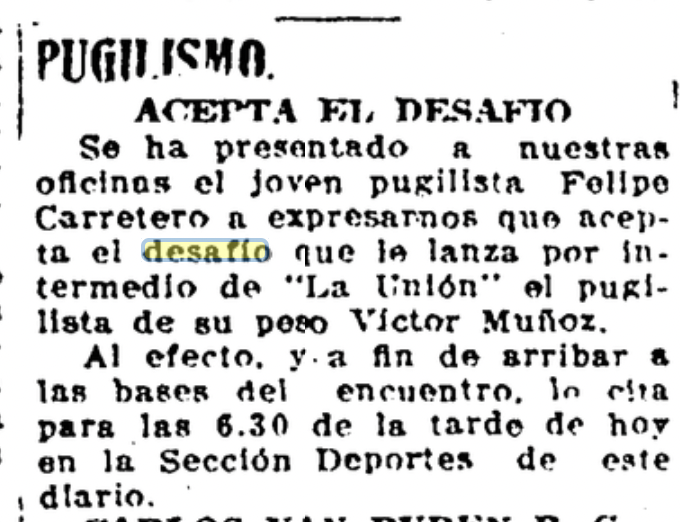
</div>

>The printing press played a crucial role in the development of emerging boxing circuits. As sports scholars have pointed out, the development of boxing and modern sports is intimately related to the emergence of mass media and the commercialization of sporting activities. Although the role of the media has been underscored to explain the rise of professional boxing at a national level, this project argues that the printing press was a crucial component of the massification of local non-professional and emerging boxing. Sporting publications and newspapers operated as brokers and intermediaries between boxers, managers and boxing clubs. Newspapers and magazines would both publicize a challenge and publish a boxer's response to a defiance. Newspaper’s offices served as the meeting point for boxers and their managers to sign contracts. During the 1920’s the public platform provided by the press bestowed challenges with a certain degree of public legitimacy, in the absence of sports governing bodies sanctioning a match contract. The role played by the press, both in Santiago and nearby towns, made it possible for boxing practitioners to create emerging circuits and offer boxing spectacles to a sporting audience that grew alongside the industrialization of urban centers. 

>This poster will use social network analysis to describe the growing amateur boxing circuit in central Chile, during the 1920s. By using public boxing challenges as a pivotal connection between boxers and their managers, this poster displays a digital representation of the networks that shaped the emerging amateur boxing community in Santiago and nearby cities. Social network analysis provides a useful approach to identify particular cliques within the boxing community and to evaluate how well-connected boxers occupied central positions within the emerging boxing spectacle circuit. It also allows for the identification of marginalized actors operating in the periphery of the boxing circuit as well as the level of permeability of centralized positions. The research offers visualizations of the network of challenges, the relative centrality of certain individuals, and the relevance of some sport publications over other media sources for the advertising of boxing challenges. It will also provide a contextualization of the historical phenomena under scrutiny and selected pictures of the boxers and their manage


**The Data**

>I have collected the data from digitized newspapers and sporting magazines published in Santiago and nearby urban areas between 1920 and 1930. I stored each public challenge in an online relational database created in Heurist, that identifies the challenging boxer, his manager and location, the challenged boxer, the terms of the fight (including the cash prize at stake, and the number of rounds, if available), the response to the challenge, the newspaper advertising the challenge and the date. The challenges' data is part of a larger database that aims to capture events, actors and organizations related to amateur boxing activities in Chile, throughout the 1920's decade. As the image below shows, the database captures the names of the boxers (as a foreign key from the database's boxers's table), the source and the source's date, the status (either accepted or rejected), the conditions of the fight, the basis, city and geoespatial data of the precise location of the contract meeting when provided, and the name of the manager if mentioned by the source. 

<div>
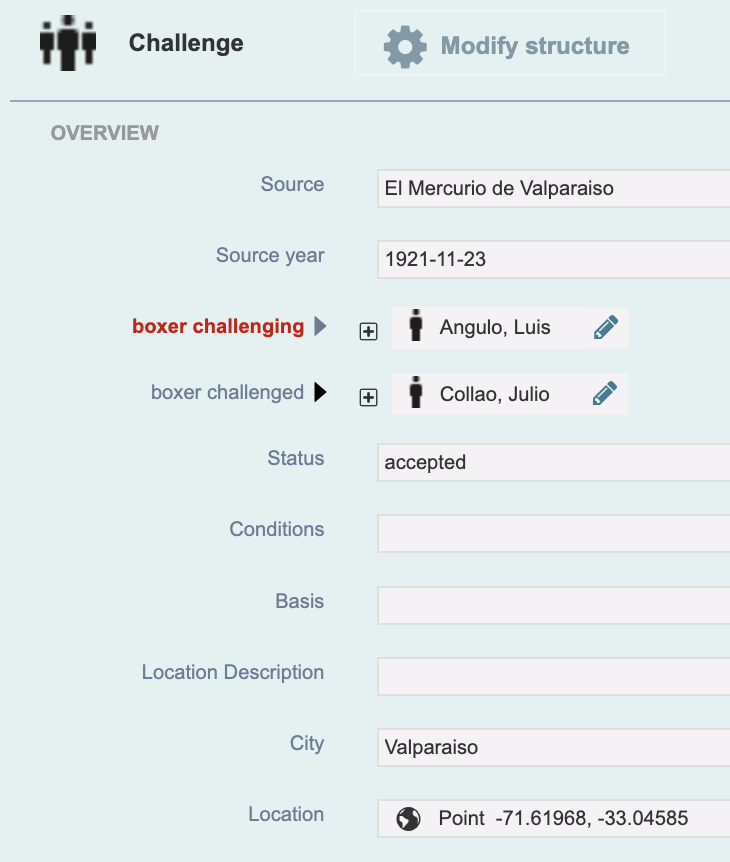
</div>

>This research aims to analyze the networks created by boxers through the mutual exchange of public challenges. A public boxing challenge is one of the many connecting links between two participants in the emerging boxing circuit. Actual fights --recorded by boxing databases-- and affiliation to a boxing club are other forms of interconnection between boxing practitioners. This research argues that, before the consolidation of professional and amateur governing bodies, public challenges confered a certain degree of formality to a practice moving towards acquiring the elements of modern sports: rationalization, bureaucratizarion, and growing commercialization. 

>This exploratory piece will explore the metodologies of social network analysis to examine the links between boxers build through the circulation of challenges. The research aims to analyze the networks by creating visualizations to discover hidden patterns, to examine te relative centrality of certain individuals, and to asses the relevance of some sport publications over other media sources for the advertising of boxing challenges.

**Boxing Challenges - Network Analysis**


>The data consist in 178 public challenges collected from digitized newspapers and sporting magazines. It has been exported from the Heurist database in a csv format. Alongside the data, a second csv file containing only the boxers has been exported as well for later uses. After a basic cleaning that included changing the data types, dealing with null values and adjusting column names, the data is ready to be deployed and analyzed in a Pandas dataframe. 

In [57]:
#importing the libraries
from matplotlib.pyplot import figure
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import sys 
import numpy as np
import operator
from operator import itemgetter

In [35]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/notebooks /challenges_cleaned_corrected.csv')
#change datatype to datetime
df['source_year'] =  pd.to_datetime(df['source_year'], errors= 'ignore')
df['challenged_id'] = df['challenged_id'].fillna(0).astype('int64')

In [36]:
df.head()

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752),1
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203),2
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016),2
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478),2
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1


**Creating the Network X graph**
>The NetworkX library allows us to create a graph object that connects a set of nodes through edges or vertices. NetworkX permits adding attributes to both edges and nodes. The graph object selected for the analysis of the networks is an undirected graph that allows back and forth connections between nodes. Although direction matters, in the sense that the challenges were directed from a challenging boxer to a challenged boxer, there is nothing preventing boxers from challenging each other. 
>The graph corresponds to a bipartite graph that divides boxers between boxers challenging and boxers challenged. In some cases, a boxer can have both conditions; the visualization presented later in this notebook deals with that situation. The attributes added to the nodes are taken from data by iterating on the pandas dataframe with the `iterrrows()` method. 

In [37]:
#creating a network x graph with the from_pandas_edgelist function and then adding attributes with several for loops. 
CH = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id', edge_attr='weight')
CH.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
CH.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
for box, row in df.iterrows():
    CH.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    CH.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
    CH.nodes[row['challenging_id']]['source'] = row['source']
    CH.nodes[row['challenging_id']]['date'] = row['source_year']
for r, d in df.iterrows():
    CH.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], challenge = d['rec_Title'])    

**Degree Centrality**

>NetworkX comes with a built in method to calculate de degree centrality of each node. The degree centrality is the metric that evaluates how many connections or neighbors a particular node has, by counting the number of edges connected to that node. Being connected with more nodes helps assesing the importance of each node in the network. The `nx.degree_centrality()` method takes graph object as an argument and returns a dictionary with the node as the key and the degree_centrality as teh value. The degree centrality has been added to the nodes with a for loop. 

In [38]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(CH)
for n in CH.nodes():
    CH.nodes[n]['centrality'] = dcs[n]
#calculating the number of nodes and edges    
len(CH.nodes), len(CH.edges)

(259, 171)

In [39]:
#With the .nodes() and the.edges() method it us possible to check the node's and edge's attributes.
#The attributes are added with a nested dictionary inside the nodes dictionary 
CH.nodes(data=True)

NodeDataView({882: {'bipartite': 'challenged', 'name': 'Araya, Manuel', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-04-05 00:00:00'), 'centrality': 0.007751937984496124}, 780: {'bipartite': 'challenged', 'name': 'Bolli, Carlos', 'centrality': 0.003875968992248062}, 833: {'bipartite': 'challenged', 'name': 'Valdes, Mario', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-01-01 00:00:00'), 'centrality': 0.015503875968992248}, 272: {'bipartite': 'challenged', 'name': 'Pérez, Amador', 'centrality': 0.003875968992248062}, 976: {'bipartite': 'challenger', 'name': 'Ortiz, Rafael', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-04-08 00:00:00'), 'centrality': 0.003875968992248062}, 827: {'bipartite': 'challenged', 'name': 'Gallardo, Pedro', 'centrality': 0.007751937984496124}, 189: {'bipartite': 'challenger', 'name': 'Silva, Carlos', 'source': 'Los Sports', 'date': Timestamp('1924-02-01 00:00:00'), 'centrality': 0.0038759689922480

In [40]:
CH.edges(data=True)

EdgeDataView([(882, 780, {'weight': 1, 'date': Timestamp('1928-04-05 00:00:00'), 'challenge': 'Araya v. Bolli'}), (882, 976, {'weight': 2, 'date': Timestamp('1928-04-08 00:00:00'), 'challenge': 'Ortiz v. Araya'}), (833, 272, {'weight': 2, 'date': Timestamp('1928-04-08 00:00:00'), 'challenge': 'Valdes v. Pérez'}), (833, 827, {'weight': 2, 'date': Timestamp('1928-01-01 00:00:00'), 'challenge': 'Valdes v. Gallardo'}), (833, 1284, {'weight': 1, 'date': Timestamp('1925-07-10 00:00:00'), 'challenge': 'Duque v. Valdes'}), (833, 836, {'weight': 1, 'date': Timestamp('1928-02-26 00:00:00'), 'challenge': 'Baeza v. Valdes'}), (827, 1367, {'weight': 1, 'date': Timestamp('1922-09-11 00:00:00'), 'challenge': 'Parraguez v. Gallardo'}), (189, 987, {'weight': 1, 'date': Timestamp('1924-02-01 00:00:00'), 'challenge': 'Silva v. Iñiguez'}), (302, 303, {'weight': 1, 'date': Timestamp('1924-03-07 00:00:00'), 'challenge': 'Flores v. Farrafino'}), (891, 573, {'weight': 2, 'date': Timestamp('1924-02-01 00:00:00

**Analyzing the Network**
> Network X comes with built-in functions to analyze the graph object. The `nx.info()` shows a summary of how many nodes and edges a graph has. The `nx.density()` analyzes the ratio of actual edges in the graph to all possible edges on a scale from 0 to 1. The graph object CH is quite low in density, due to both the nature of the relationship between boxers --in most of the cases a a one-to-one challenge--, and to the incompleteness of the data collected. 

In [41]:
#Print network summary
print("Network summary: \n-----------------\n", nx.info(CH))

Network summary: 
-----------------
 Graph with 259 nodes and 171 edges


In [42]:
#Print network density
print("Network density: \n-----------------\n", nx.density(CH))

Network density: 
-----------------
 0.005118074885516746


>**The nx.degree_centrality** built-in function measures the centrality of a node within the context of a network. A higher value means that a node has more direct connections with other nodes. Being connected to more nodes reflects the importance of a paritular node within a particular setting. Degree centrality is calculated by adding the number of neighbors a particular node has, an dividing that number by the number of all possible neighbors that particular node could be connected with.
>By applying the nx.degree_centrality 

In [43]:
#Function sort_dict to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)

In [45]:
#Find centrality of nodes
print("\nCentrality :\n---------------")
sort_dict(nx.degree_centrality(CH))


Centrality :
---------------
639  =  0.031007751937984496
836  =  0.027131782945736434
1131  =  0.01937984496124031
833  =  0.015503875968992248
647  =  0.015503875968992248
178  =  0.015503875968992248
1414  =  0.015503875968992248
1010  =  0.011627906976744186
146  =  0.011627906976744186
935  =  0.011627906976744186
1079  =  0.011627906976744186
1261  =  0.011627906976744186
1389  =  0.011627906976744186
1549  =  0.011627906976744186
882  =  0.007751937984496124
827  =  0.007751937984496124
573  =  0.007751937984496124
332  =  0.007751937984496124
1012  =  0.007751937984496124
143  =  0.007751937984496124
1026  =  0.007751937984496124
732  =  0.007751937984496124
223  =  0.007751937984496124
1080  =  0.007751937984496124
1138  =  0.007751937984496124
276  =  0.007751937984496124
1142  =  0.007751937984496124
1157  =  0.007751937984496124
156  =  0.007751937984496124
1179  =  0.007751937984496124
1177  =  0.007751937984496124
1198  =  0.007751937984496124
1205  =  0.0077519379844961

In [59]:
degree_dict = nx.degree_centrality(CH) # Run degree centrality
sorted_centrality = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by degree centrality:")
for b in sorted_centrality[:10]:
    print(b)

Top 10 nodes by degree centrality:
(639, 0.031007751937984496)
(836, 0.027131782945736434)
(1131, 0.01937984496124031)
(833, 0.015503875968992248)
(647, 0.015503875968992248)
(178, 0.015503875968992248)
(1414, 0.015503875968992248)
(1010, 0.011627906976744186)
(146, 0.011627906976744186)
(935, 0.011627906976744186)


In [61]:
print(CH.nodes[639])
print(CH.nodes[836])
print(CH.nodes[1131])
print(CH.nodes[833])
print(CH.nodes[647])
print(CH.nodes[178])
print(CH.nodes[1414])
print(CH.nodes[1010])
print(CH.nodes[146])
print(CH.nodes[935])

{'bipartite': 'challenger', 'name': 'Gonzalez, Johnston', 'source': 'El Mercurio de Valparaiso', 'date': Timestamp('1921-03-10 00:00:00'), 'centrality': 0.031007751937984496}
{'bipartite': 'challenged', 'name': 'Baeza, Florencio', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-02-26 00:00:00'), 'centrality': 0.027131782945736434}
{'bipartite': 'challenged', 'name': 'Coll, Lorenzo', 'source': 'La Nacion', 'date': Timestamp('1927-07-23 00:00:00'), 'centrality': 0.01937984496124031}
{'bipartite': 'challenged', 'name': 'Valdes, Mario', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-01-01 00:00:00'), 'centrality': 0.015503875968992248}
{'bipartite': 'challenger', 'name': 'Olguín, Humberto', 'source': 'Los Sports', 'date': Timestamp('1925-11-27 00:00:00'), 'centrality': 0.015503875968992248}
{'bipartite': 'challenged', 'name': 'Vargas, Armando', 'source': 'Los Sports', 'date': Timestamp('1925-08-14 00:00:00'), 'centrality': 0.015503875968992248}
{'bi

In [62]:
#find number of nodes they are connected with
print('The boxer Johnston Gonzalez is connected with', nx.degree(CH, 639), 'nodes')
print('The boxer Florencio Baeza is connected with', nx.degree(CH, 836), 'nodes')
print('The boxer Lorenzo Coll is connected with', nx.degree(CH, 1131), 'nodes')
print('The boxer Mario Valdes is connected with', nx.degree(CH, 833), 'nodes')
print('The boxer Humberto Olguín is connected with', nx.degree(CH, 647), 'nodes')
print('The boxer Armando Vargas is connected with', nx.degree(CH, 178), 'nodes')
print('The boxer Luis Angulo is connected with', nx.degree(CH, 1414), 'nodes')
print('The boxer Erasmo Molina is connected with', nx.degree(CH, 1010), 'nodes')
print('The boxer Enrique Lasseube is connected with', nx.degree(CH, 146), 'nodes')
print('The boxer Carlos Ibarra is connected with', nx.degree(CH, 935), 'nodes')

The boxer Johnston Gonzalez is connected with 8 nodes
The boxer Florencio Baeza is connected with 7 nodes
The boxer Lorenzo Coll is connected with 5 nodes
The boxer Mario Valdes is connected with 4 nodes
The boxer Humberto Olguín is connected with 4 nodes
The boxer Armando Vargas is connected with 4 nodes
The boxer Luis Angulo is connected with 4 nodes
The boxer Erasmo Molina is connected with 3 nodes
The boxer Enrique Lasseube is connected with 3 nodes
The boxer Carlos Ibarra is connected with 3 nodes


**Analysis of the 3 highest Degree Centrality scores**

>With 8 connections, the node_id 639 corresponds to the professional boxer light-heavyweight Johnston Gonzalez. Gonzalez is the boxer that, according to the data collected, has the most number of connections as a challenging boxer. However, he did not receive any challenge. According to the online boxing website boxrec, <a href='https://boxrec.com/en/box-pro/338883'>Johnston Gonzalez</a> is one of the boxers with the largest record from the whole dataset. From the year 1925 Gonzalez fought as a professional fighter. All his challenges were published between 1924-1925, right when his professional career was starting off. The welterweight <a href='https://boxrec.com/en/box-pro/133670'>Florencio Baeza</a> is a similar case. According to the data, he challenged a boxer 2 times, and got challenged 5 times, adding a total of 7 connections. All of those challenges happened between 1925-1928, right when Baeza was kicking off a professional career that took him to the US in the early 1930s. Finally, the feather weight <a href='https://boxrec.com/en/box-pro/335015'>Lorenzo Coll</a> challenged another boxer 4 times and was challenged only two times. If we cross the data in <a href='https://boxrec.com/'>Boxrec</a> the challenge collected also coincides with the early stages of Coll's career. As a preliminary conclusion, it can be argued that during the 1920's, the number of challenges a particular boxer engaged with is proportionately correlated with advancing a professional boxer career. 


**The Visualization**

In [63]:
# 1. create a bipartite list for boxers challenged and boxers challenging
challengers = [node for node in CH.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in CH.nodes() if node in df.challenged_id.unique()]
print(len(challengers))
print(len(challenged))

131
148


In [71]:
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CH, prog="twopi")
#pos["639"] = (0.10,0.10)

In [66]:
# 3. Size of bipartite nodes according to the degree centrality
size = [CH.degree(node) * 2500 for node in CH.nodes() if node in df.challenging_id.unique()]
size_ed = [CH.degree(node) * 1900 for node in CH.nodes() if node in df.challenged_id.unique()]

In [67]:
# 4. Creating labels from edge and nodes atributes
edge_labels = nx.get_edge_attributes(CH, 'challenge')
node_labels = nx.get_node_attributes(CH, 'name')

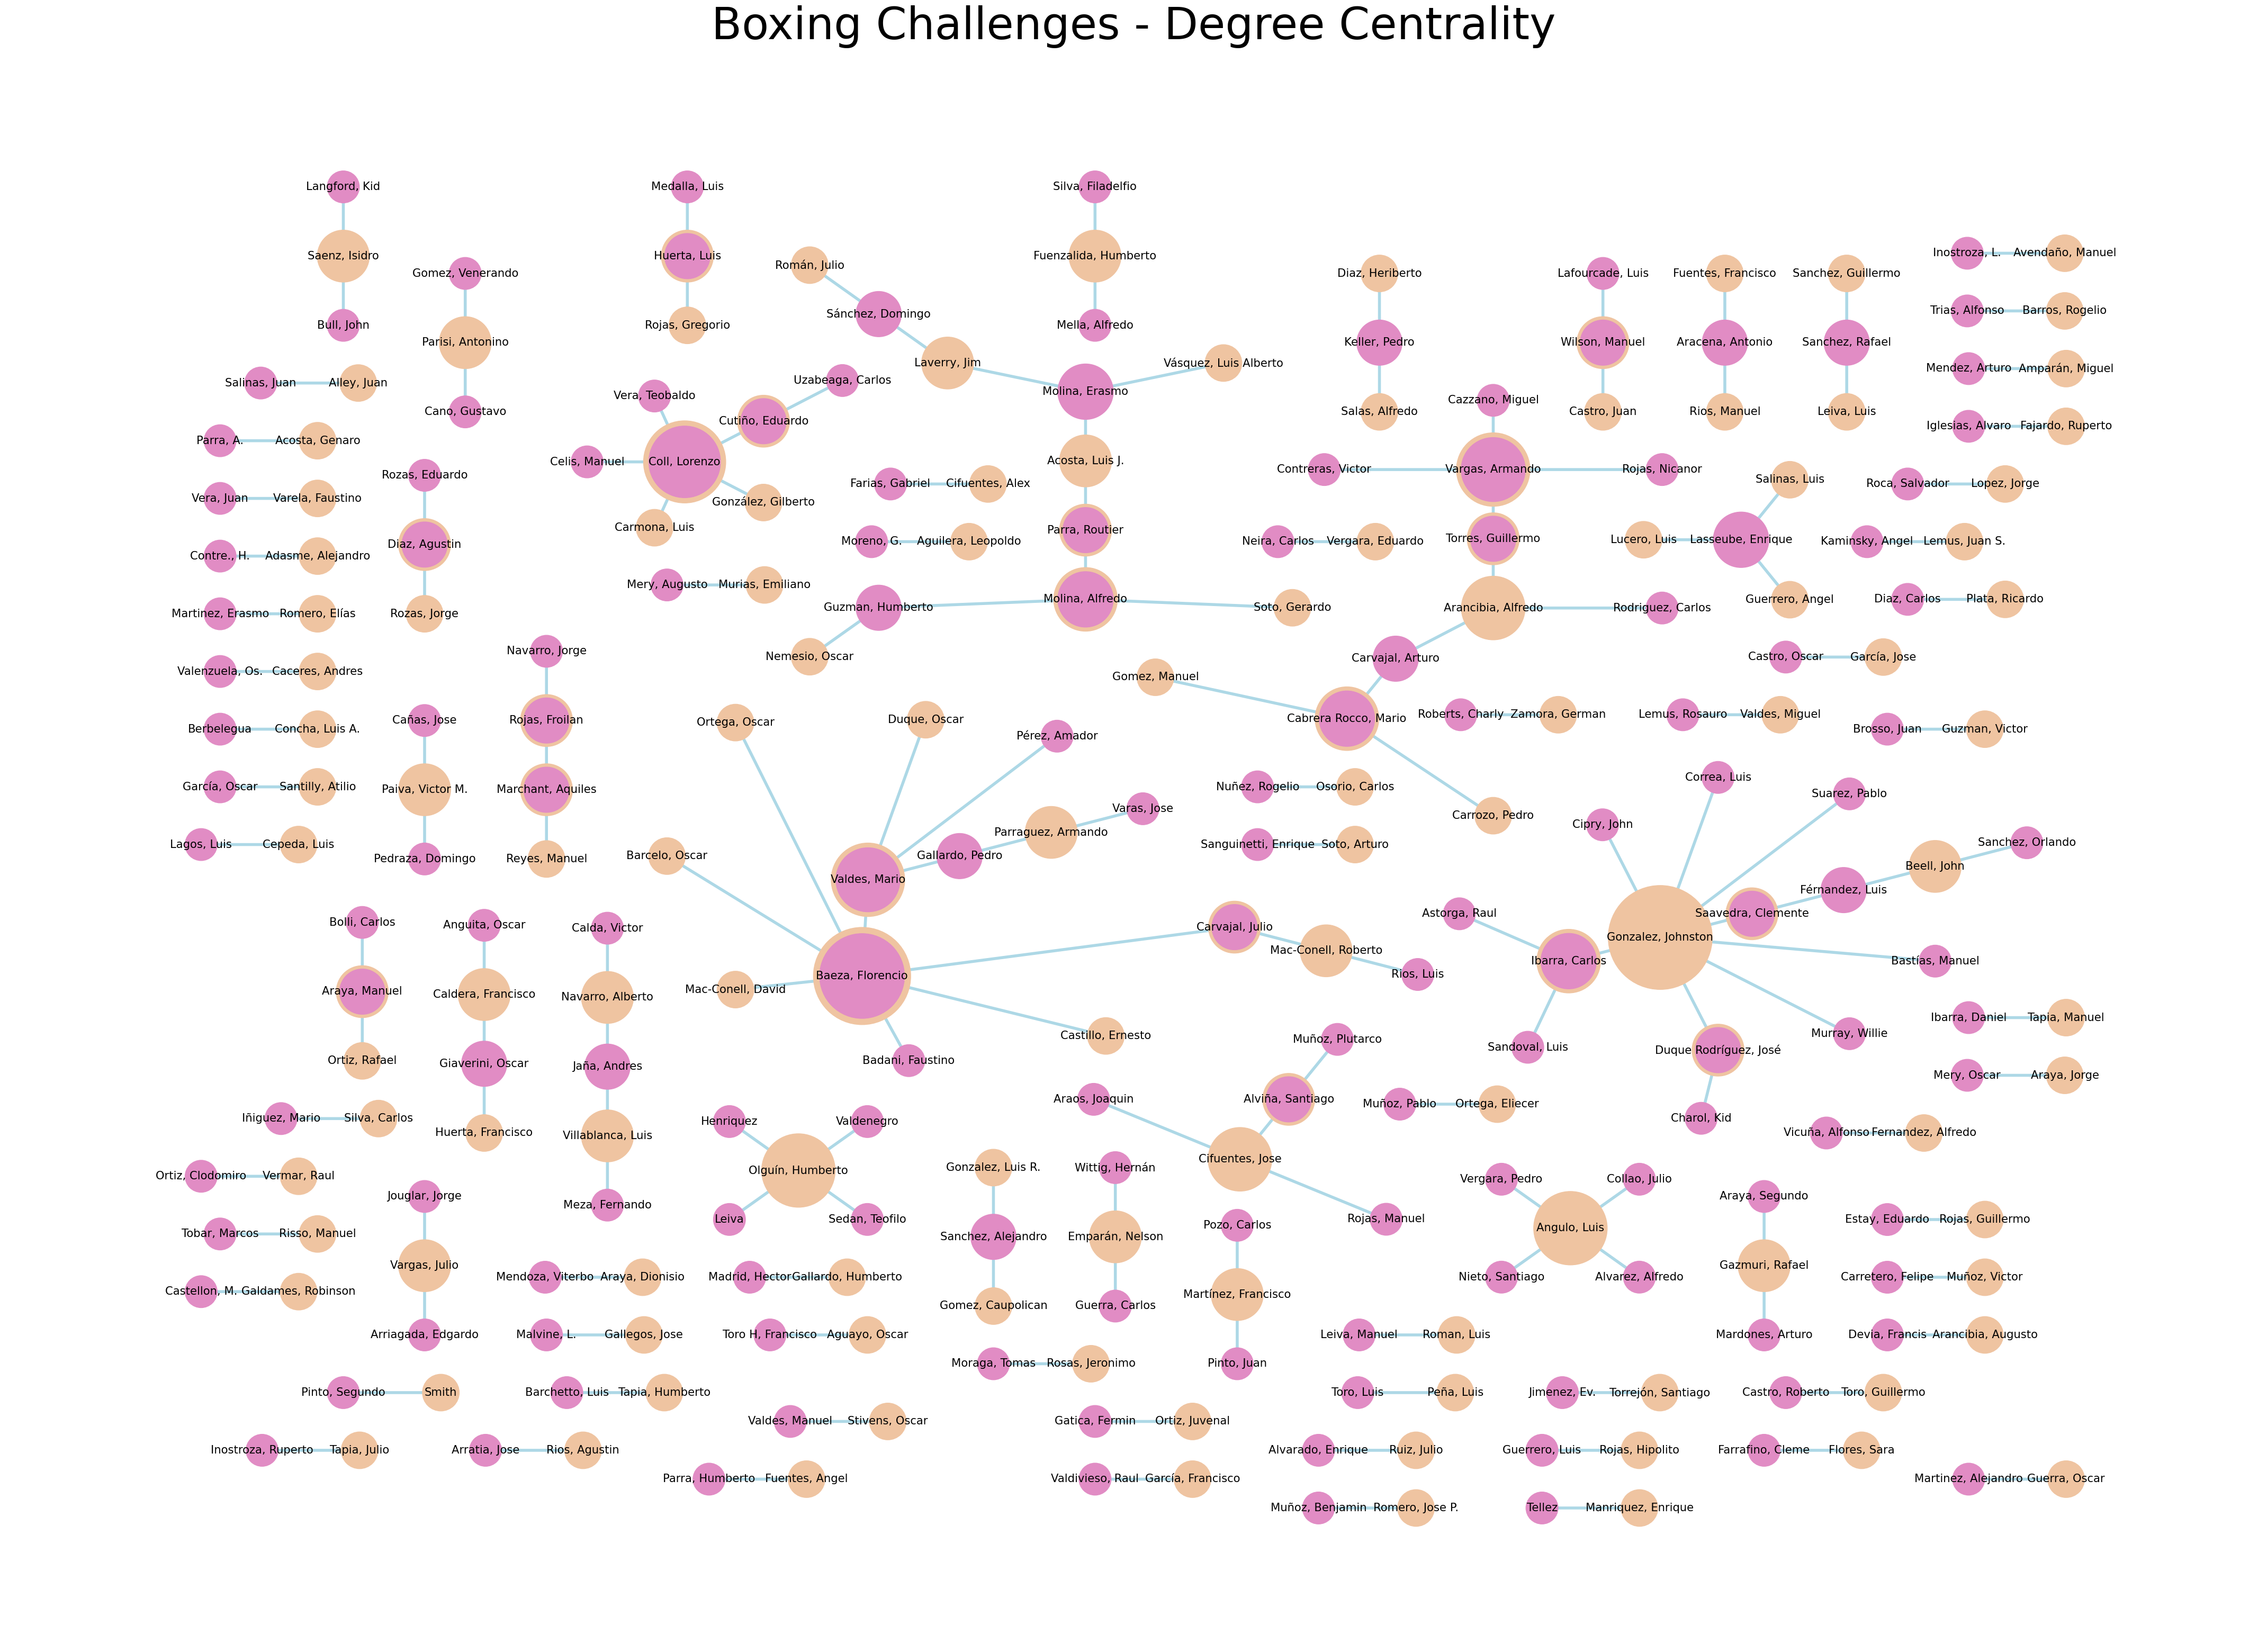

In [72]:
fig, ax = plt.subplots(figsize=(55, 40), dpi=100)
# 2. Create a layout for our nodes 
#pos = nx.nx_agraph.graphviz_layout(CH, prog="twopi")
#pos["639"] = (0.005,0.005)
nx.draw_networkx_edges(CH, pos, edge_color='lightblue', arrows=True, arrowstyle ='-', arrowsize=65, width=4.0)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=size_ed, node_color ='#E18CC4')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=15.2)
#nx.draw_networkx_edge_labels(CH, pos, edge_labels = edge_labels, font_size= 10)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.title('Boxing Challenges - Degree Centrality', fontsize=60)
fig = plt.gcf()
#fig.savefig('figure_9.pdf', dpi=100, format='pdf', bbox_inches='tight') 
#fig.savefig('graph_centrality_02.svg', dpi=1200, format='svg', bbox_inches='tight') 
#fig.savefig('figure_9.png', dpi=100, format='png', bbox_inches='tight')
plt.show()

**Conclusion**

In [73]:
print('hello world')

hello world
